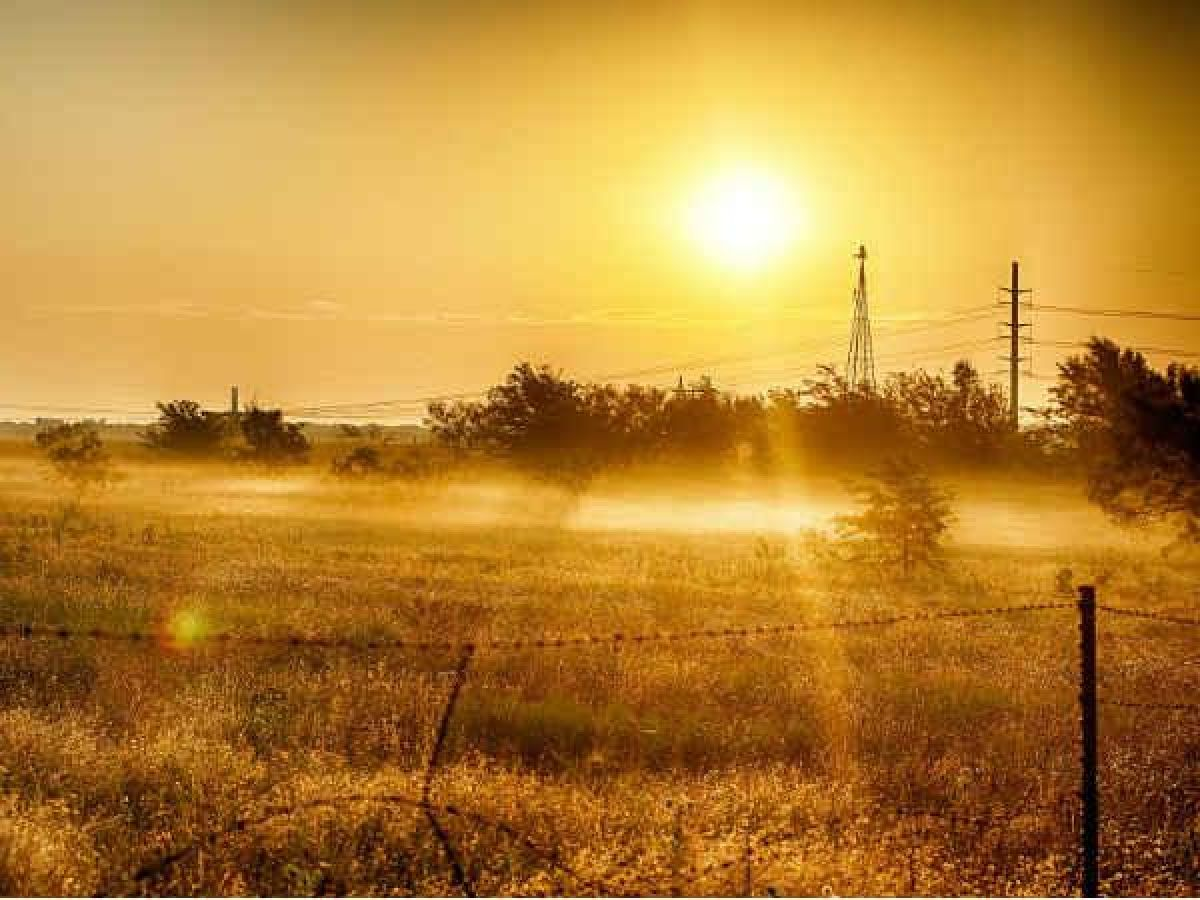

# Aim:Temperature Forecast using Machine Learning. 

#### Problem Statement:

Predicting the weather based on past data and checking the variations with the true values.  

The data for this is taken from UCI ml repo.  

### Dataset Information

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data.Hindcast validation was conducted for the period from 2015 to 2017.

### Attribute Information:

For more information, read [Cho et al, 2020].  
1. station - used weather station number: 1 to 25   
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')   
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6  
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9  
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5  
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100   
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5   
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6  
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9  
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4  
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97   
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97   
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98   
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97   
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7   
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6   
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8   
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7   
19. lat - Latitude (Â°): 37.456 to 37.645   
20. lon - Longitude (Â°): 126.826 to 127.135   
21. DEM - Elevation (m): 12.4 to 212.3   
22. Slope - Slope (Â°): 0.1 to 5.2   
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9   
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9   
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T   

Please note that there are two target variables here:   
 
1) Next_Tmax: Next day maximum temperature  

2) Next_Tmin: Next day  minimum temperature  


##### Import all the required library 

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [2]:
data= pd.read_csv("temperature.csv")

In [3]:
data.sample(10)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
6048,24.0,24-08-2016,32.7,27.6,47.192936,81.615585,31.201305,26.447989,6.442724,58.550972,0.053314,0.066311,0.160427,0.695706,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.2223,4632.573730,33.1,24.4
6725,1.0,21-07-2017,29.2,24.7,74.399040,94.694588,29.007390,25.470094,6.148479,58.295087,0.484127,0.465882,0.519059,0.439499,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.7850,5763.888672,29.7,24.7
5806,7.0,15-08-2016,33.8,26.1,60.767162,90.787560,30.751059,25.581580,5.706952,116.704501,0.362755,0.154345,0.057513,0.027884,0.016938,0.000775,0.005285,0.000000,37.5776,126.838,12.3700,0.0985,4952.109863,35.0,26.4
3807,8.0,28-07-2015,30.5,24.2,81.791931,96.340218,27.929851,25.484324,7.827732,40.742103,0.476165,0.728929,0.623548,0.434121,0.000000,0.979882,0.091301,0.000000,37.4697,126.910,52.5180,1.5629,5483.880859,29.3,24.2
6684,10.0,19-07-2017,32.0,22.9,53.546654,71.531731,32.657155,25.896202,6.544328,86.243979,0.005402,0.019536,0.014050,0.079699,0.000000,0.000000,0.000000,0.000000,37.4562,126.955,208.5070,5.1782,5668.401855,33.0,23.3
1724,25.0,06-07-2014,29.0,24.1,31.171154,69.004585,33.160447,23.830722,5.617269,20.637488,0.297800,0.074460,0.007614,0.057935,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.2713,5814.271973,35.1,21.4
6204,5.0,30-06-2017,31.0,21.8,55.004128,92.867073,27.988202,22.164184,6.241006,104.791246,0.173245,0.291852,0.447998,0.823050,0.000000,0.000000,0.000000,0.014004,37.5507,127.135,35.0380,0.5055,5859.552246,29.8,22.4
481,7.0,19-07-2013,30.3,24.5,73.326569,89.011772,28.871287,25.164931,10.050882,97.020019,0.244959,0.411978,0.257108,0.343359,0.000000,0.000000,0.000000,0.000000,37.5776,126.838,12.3700,0.0985,5645.982910,30.6,25.3
275,1.0,11-07-2013,22.4,21.7,95.818939,98.020599,23.356801,21.447190,11.558632,25.803418,0.882198,0.963207,0.971772,0.862037,0.621599,4.398933,3.587557,0.520114,37.6046,126.991,212.3350,2.7850,5904.711426,21.8,21.1
1619,20.0,02-07-2014,30.1,22.2,86.813499,98.342522,22.021183,19.790444,13.368730,77.478588,0.789755,0.625152,0.748815,0.329051,1.019411,0.172152,0.454999,0.009224,37.6181,127.004,146.5540,4.7296,5921.158691,23.9,20.9


In [4]:
data.shape

(7752, 25)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


#### Data Information:
Target Columns :  Next_Tmax  and  Next_Tmin    
Data haviing 7752 entries, 0 to 7751    
Dataset having 25 columns and 7752 Rows    
We have 24 float type columns and 1 object   
Few columns also having null values    
Data memory usage 1.5+ MB   

Lets check the null values present in the data. 

In [6]:
data.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

<AxesSubplot:>

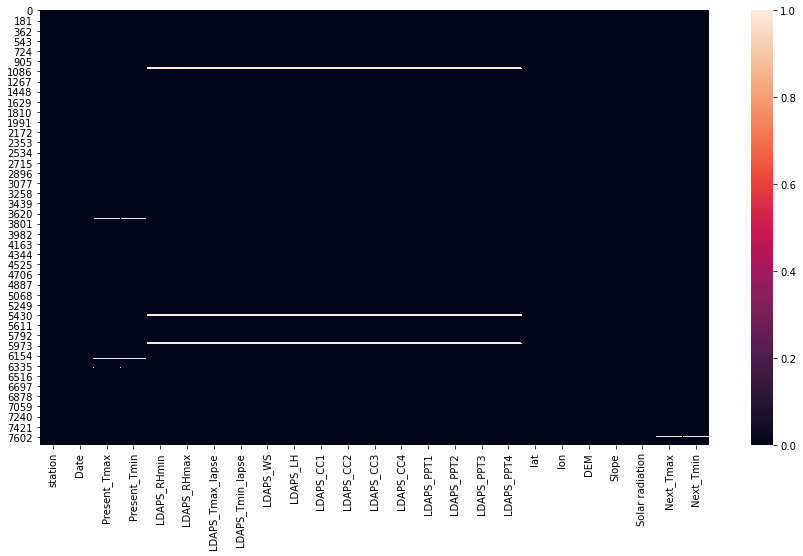

In [7]:
plt.figure(figsize= (15,8))
sns.heatmap(data.isnull())

We can see data is having missing values. Only below mentioned columns are not having any null values.   
lat                   
lon                    
DEM                     
Slope                   
Solar radiation         

In [8]:
data.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,0.356080,0.318404,0.299191,0.591995,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,0.258061,0.250362,0.254348,1.945768,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,0.140615,0.101388,0.081532,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,0.312421,0.262555,0.227664,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,0.558694,0.496703,0.499489,0.052525,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


From above table we can see data is collected from 25 stations.  

Present_Tmax 
mean- 29.768211    
std - 2.969999  
max- 37.600000  
min- 20.000000  

Present_Tmin   
mean- 23.225059     
std - 2.413961   
max- 29.900000   
min- 11.300000   

Next_Tmax   
mean- 30.274887    
std - 3.128010   
max- 38.900000   
min- 17.400000  

Next_Tmin   
mean- 22.932220         
std - 2.487613    
max- 29.800000   
min- 11.300000   

### Treating Nan Values 

We can see Our Nan Vlaue are less than 0.01 percent, we can drop these values also,  
But here we will try to fill these values using Mean or median  
Filling Nan with median could be best stretgy here because data is ordinal type.  
lets see type of Nan values and fill them. 

In [9]:
data.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

We are missing 2 values in station and 2 values in data.  
As we know we have 25 stations and Nan is present at 7750 and 7751 index, Here we can see data is collected in ordered way from all stations, so after 25th, count will start from 1st agin. 
so for 7750 index it will agin the 1st station for 7751 it will be the 2nd station. 

In [10]:
# Fillign Nan in station column 
data['station'].iloc[7750]=1.0 
data['station'].iloc[7751]=2.0

In [11]:
# Filling date column
data['Date'].iloc[7750]= '31-08-2017'
data['Date'].iloc[7751]= '31-08-2017'

In [12]:
# Filling rest of the values using meadian of that column
for col in data.columns:
    if col not in ['station', 'Date']:
        data[col]=data[col].replace(np.nan, data[col].median())

In [13]:
data.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

Now we have filled all the Nan values with median of that column.  
Here we can see our date is object type, so we will first change it into datatime stamp for more useful information. 

In [14]:
data['Date']= pd.to_datetime(data['Date'])

### Data visualization

#### Univariate Analysis

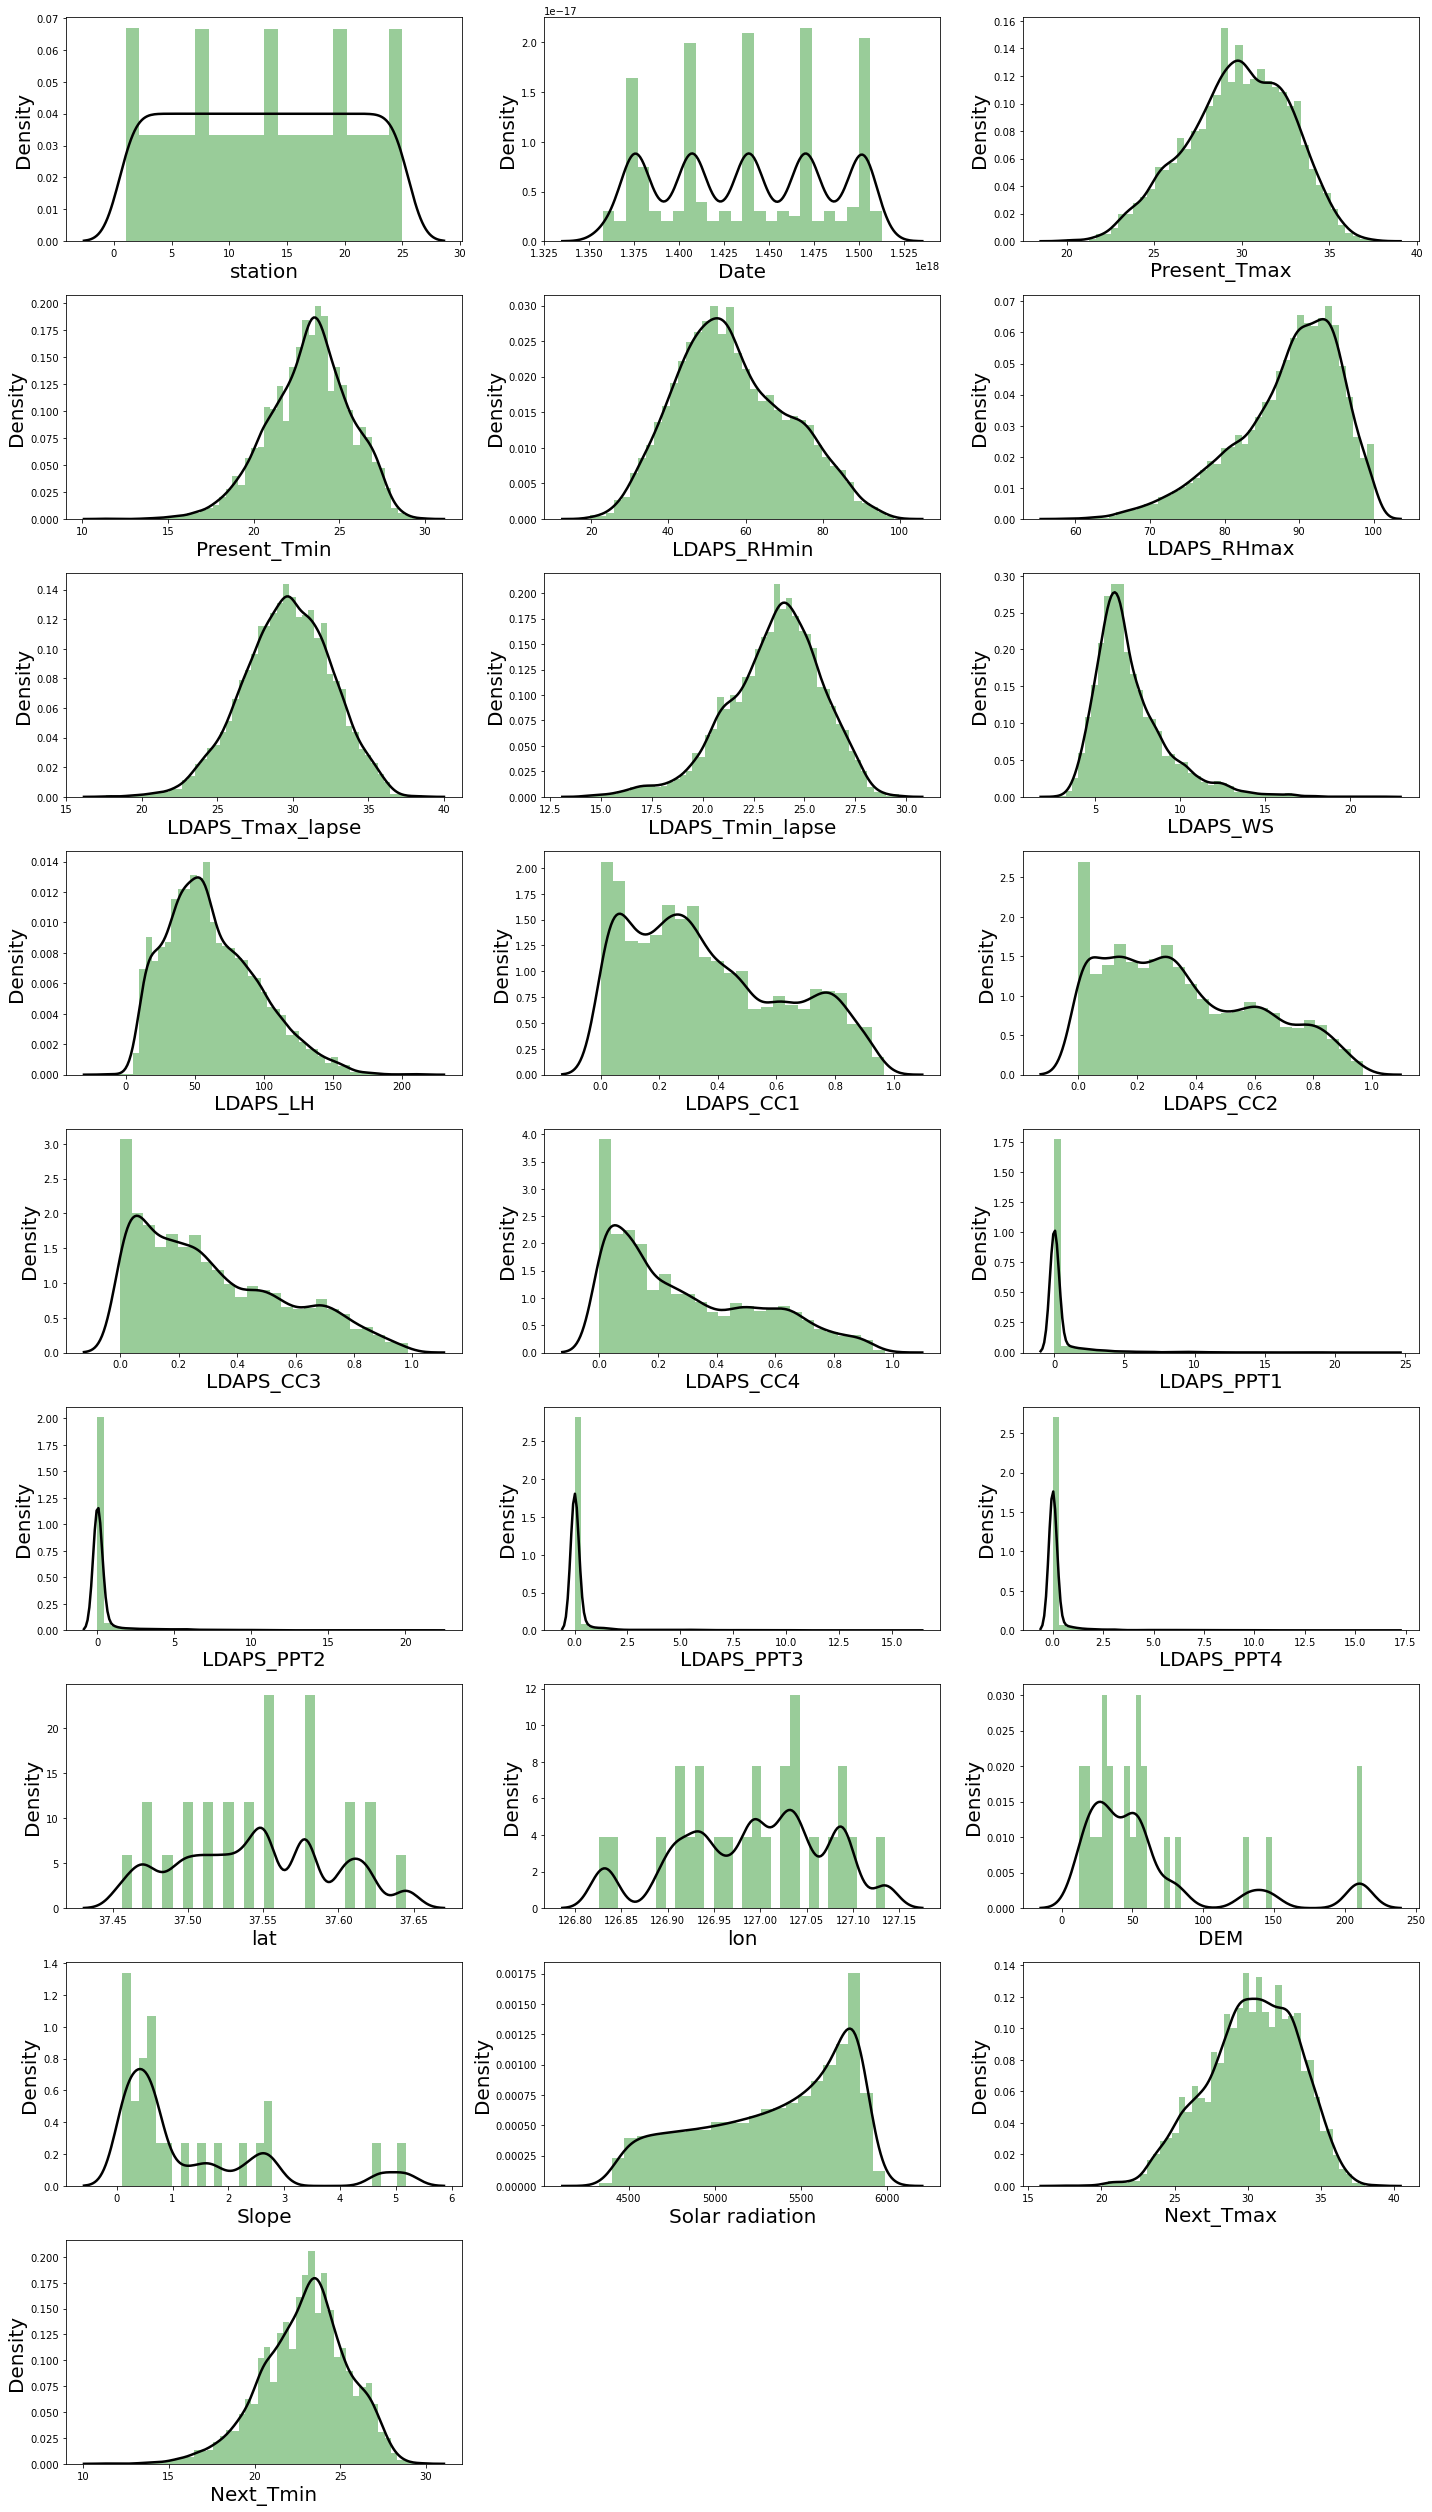

In [15]:
plt.figure(figsize=(20,35), facecolor='white')
plotnumber= 1

for column in data.columns:
    if plotnumber<=26:
        ax= plt.subplot(9,3, plotnumber)
        sns.distplot(data[column], color='green',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
        plt.xlabel(column, fontsize= 20)
        plt.ylabel('Density', fontsize= 20)
    plotnumber+=1
plt.tight_layout()

1. station: We have total 25 station and data is normal distributed in all 25 stations    
2. Date : We have data from 2013-06-30 to 2017-08-31    
3. Present_Tmax : Maximum air temperature between 0 and 21 h on the present day is normaly distributed.  
4. Present_Tmin : Minimum air temperature between 0 and 21 h on the present day  is normaly distributed.  
5. LDAPS_RHmin: LDAPS model forecast of next-day minimum relative humidity is normaly distributed.   
6. LDAPS_RHmax: LDAPS model forecast of next-day maximum relative humidity is having skewness and almost normaly distributed.  
7. LDAPS_Tmax_lapse: LDAPS model forecast of next-day maximum air temperature applied lapse rate is normaly distributed.   
8. LDAPS_Tmin_lapse: LDAPS model forecast of next-day minimum air temperature applied lapse rate is normaly distributed.   
9. LDAPS_WS : LDAPS model forecast of next-day average wind speed is almost normaly distributed and having skewness.   
10. LDAPS_LH: LDAPS model forecast of next-day average latent heat flux is normaly distributed.   
11. LDAPS_CC1: LDAPS model forecast of next-day 1st 6-hour split is almost normaly distribution and having positive skew  
12. LDAPS_CC2 LDAPS model forecast of next-day 2nd 6-hour split data is not normaly distributed and having negative skew  
13. LDAPS_CC3: LDAPS model forecast of next-day 3rd 6-hour split  is normaly distributed and having positive skew  
14. LDAPS_CC4: LDAPS model forecast of next-day 4th 6-hour split is almost normaly distributed and having positive skew    
15. LDAPS_PPT1,  LDAPS_PPT2,  LDAPS_PPT3,  LDAPS_PPT4  are not normaly distributed and having outliers.   
16. Solar radiation : Solar radiation is normaly distributed and having negative skewed data.  
17. Next_Tmax,  Next_Tmin The next-day maximum air temperature is normaly distributed.   


In [16]:
data['Slope'].value_counts()

0.514100    310
0.266100    310
1.231300    310
0.572100    310
2.785000    310
2.257900    310
5.178200    310
0.505500    310
0.222300    310
2.686500    310
0.133200    310
1.562900    310
0.155400    310
2.534800    310
0.145700    310
0.855200    310
0.098500    310
0.697000    310
0.593100    310
1.767800    310
0.412500    310
0.618000    310
0.271300    310
4.729600    310
0.623300    310
0.098475      1
5.178230      1
Name: Slope, dtype: int64

Text(0, 0.5, 'Counts')

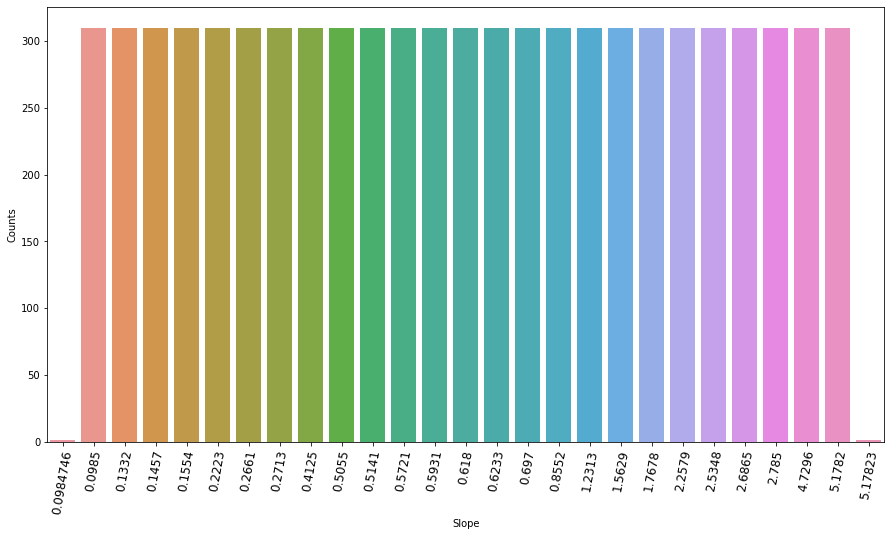

In [17]:
plt.figure(figsize=(15,8))
sns.countplot(x='Slope',data=data)
locs, labels = plt.xticks(fontsize= 12)
plt.setp(labels, rotation=80)
plt.ylabel('Counts')

All the slope values have equal no. of counts except for 2 slopes which have only one count each.

In [18]:
data['DEM'].value_counts()

212.3350    311
12.3700     311
30.0464     310
82.2912     310
15.5876     310
45.7160     310
17.2956     310
52.5180     310
208.5070    310
54.6384     310
59.8324     310
132.1180    310
30.9680     310
33.3068     310
53.4712     310
50.9312     310
44.7624     310
19.5844     310
26.2980     310
75.0924     310
28.7000     310
56.4448     310
35.0380     310
146.5540    310
21.9668     310
Name: DEM, dtype: int64

Text(0, 0.5, 'Counts')

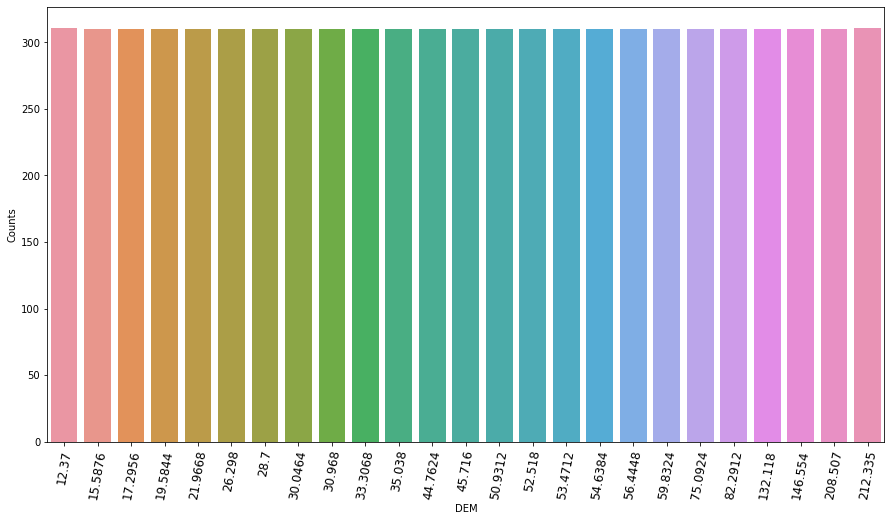

In [19]:
plt.figure(figsize=(15,8))
sns.countplot(x='DEM',data=data)
locs, labels = plt.xticks(fontsize= 12)
plt.setp(labels, rotation=80)
plt.ylabel('Counts')

All the elevations have same count equal to 310 except two who have 311 counts each

## Bivariate Analysis

Here we will analyse our data against our target column. 

Lets analyse the graphs between date and in our target columns. 
we will use line plot for numerical to numerical data visualization. 

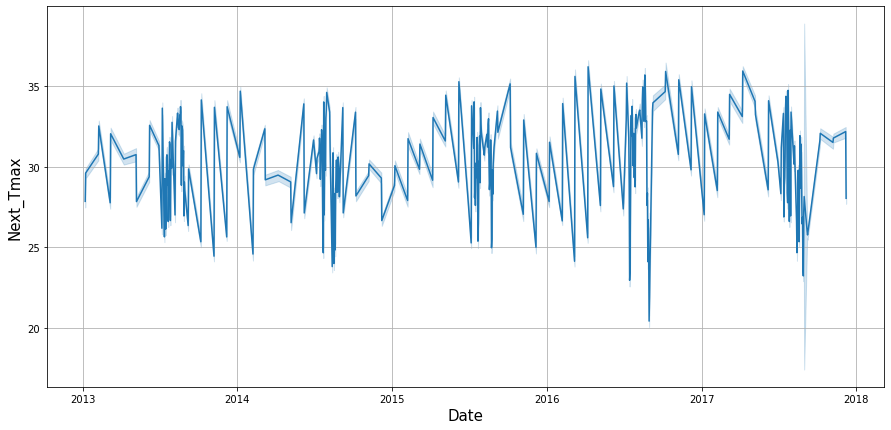

In [20]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Date', y='Next_Tmax', data= data )
plt.xlabel('Date', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)
plt.grid(True)
plt.show()

From the Graphs we can see the Next_Tmax is maximum  between te 2017 to 2018 and it is min between 2016 to 2017. 

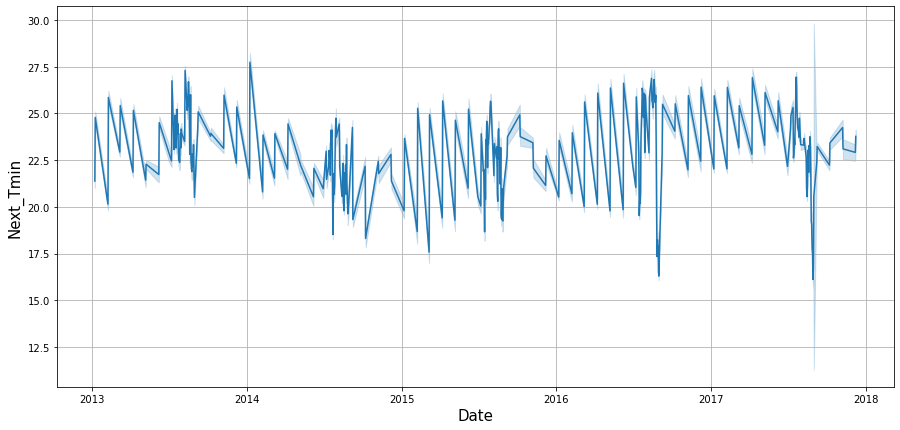

In [21]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Date', y='Next_Tmin', data= data )
plt.xlabel('Date', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)
plt.grid(True)
plt.show()

From the Graphs we can see the Next_Tmin is maximum is in the starting of 2014 and it is minimum between 2017 to 2018. 

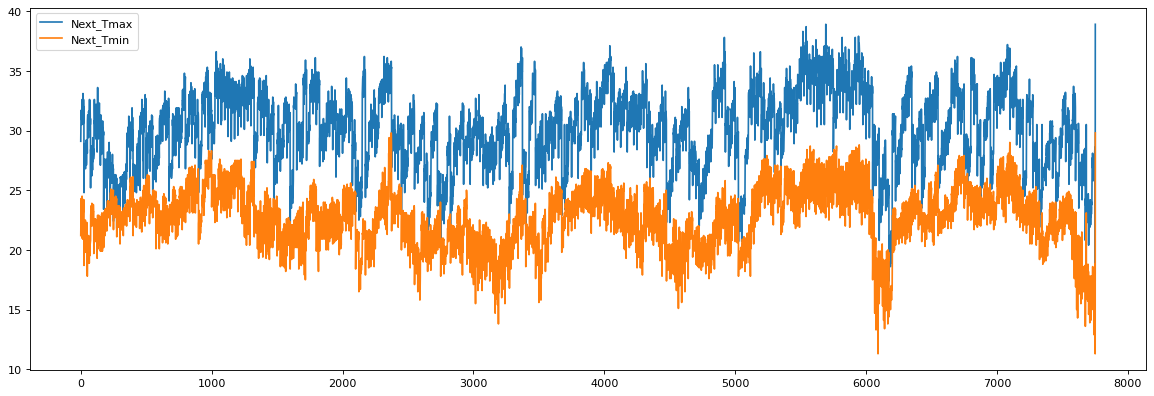

In [22]:
plt.figure(figsize=(18, 6), dpi=80)
plt.plot(data["Next_Tmax"],label="Next_Tmax")
plt.plot(data["Next_Tmin"],label="Next_Tmin")
plt.legend()
plt.show()

Here we can see Next_tmin and Next_tmax both showing almost equal kind of pattern. where there is growth in the Tmax, same kind of growth we can see in Tmin. 

<AxesSubplot:xlabel='station', ylabel='Next_Tmin'>

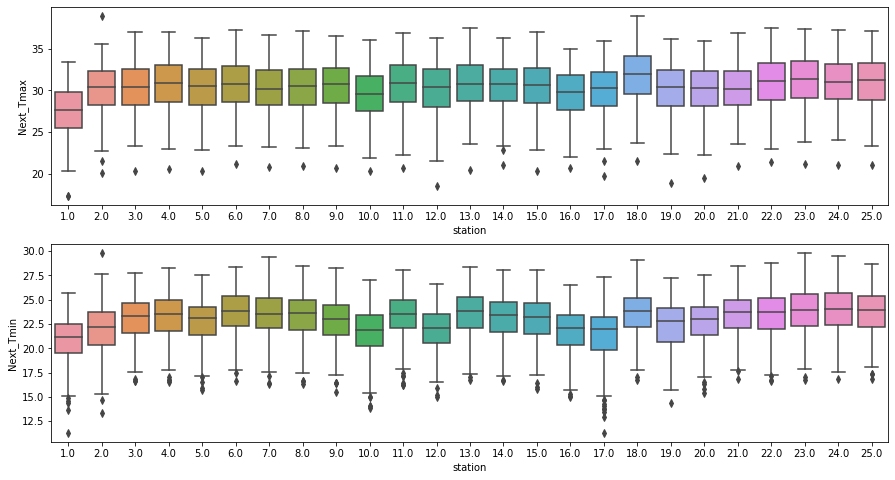

In [23]:
#Ploting wrt to station
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
sns.boxplot(x='station',y='Next_Tmax',data=data)

plt.subplot(2,1,2)
sns.boxplot(x='station',y='Next_Tmin',data=data)

Graph showing the temprature at every 25 stations. we can clearly see Tmax and Tmin is maximum at station 18 and it is minimun at station 1 

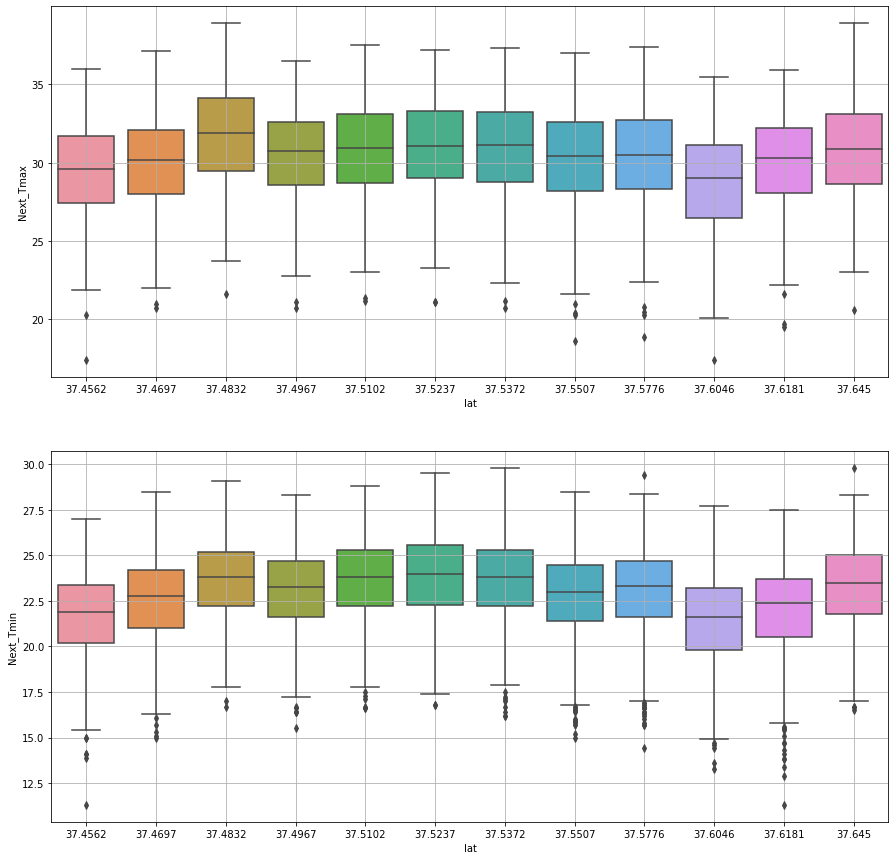

In [24]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.boxplot(x='lat',y='Next_Tmax',data=data)
plt.grid(True)
plt.subplot(2,1,2)
sns.boxplot(x='lat',y='Next_Tmin',data=data)
plt.grid(True)


Here we can see the relationship between latitude and Next temprature.  
we can see Next_Tmax increases with increase in the latitude while this is not the True for Next_Tmin 

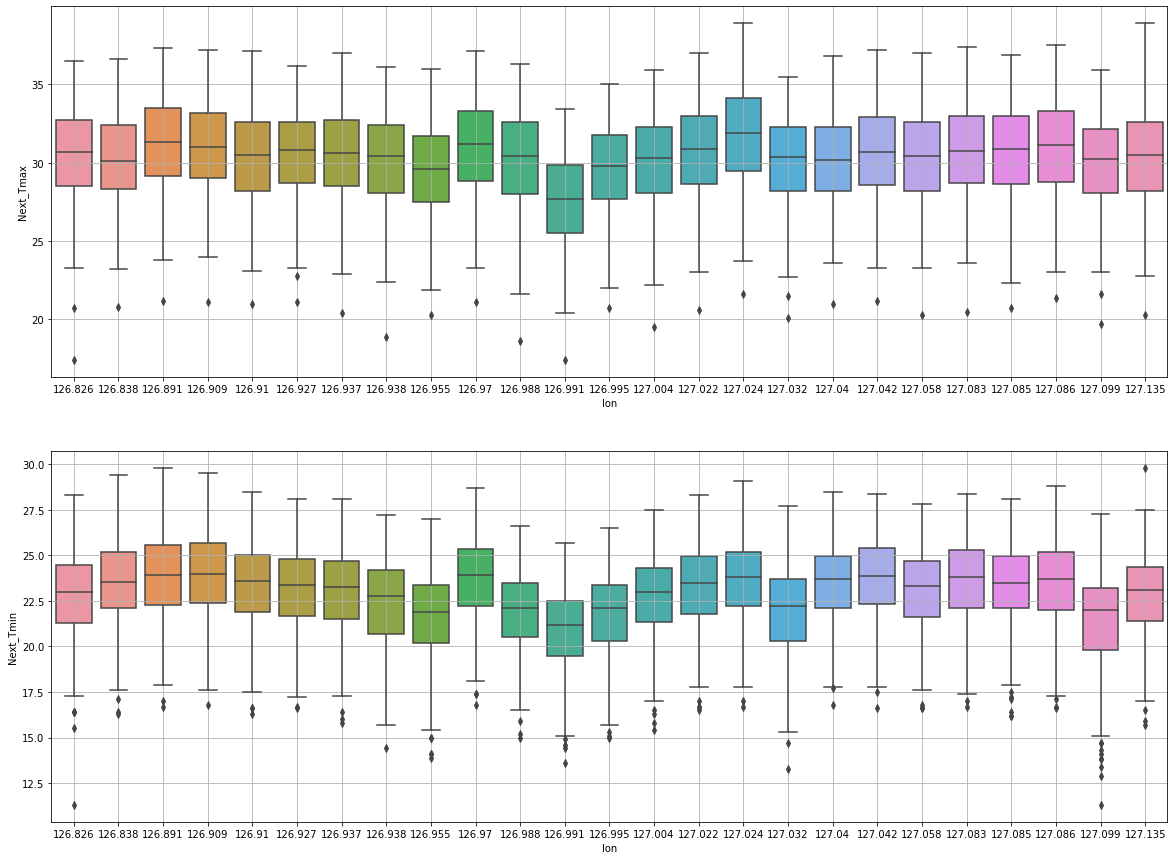

In [25]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sns.boxplot(x='lon',y='Next_Tmax',data=data)
plt.grid(True)
plt.subplot(2,1,2)
sns.boxplot(x='lon',y='Next_Tmin',data=data)
plt.grid(True)

Here we can see there is not direct relationship between the temprature and Longitude. 

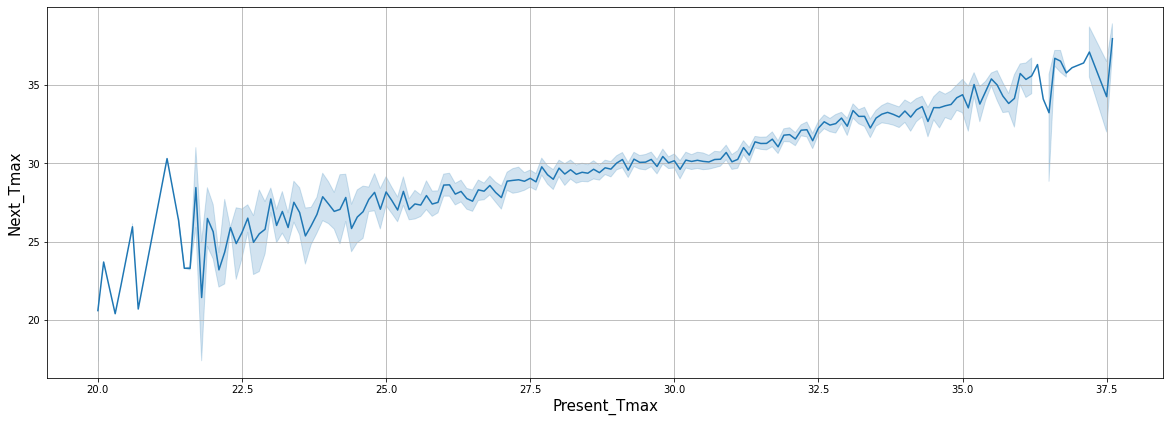

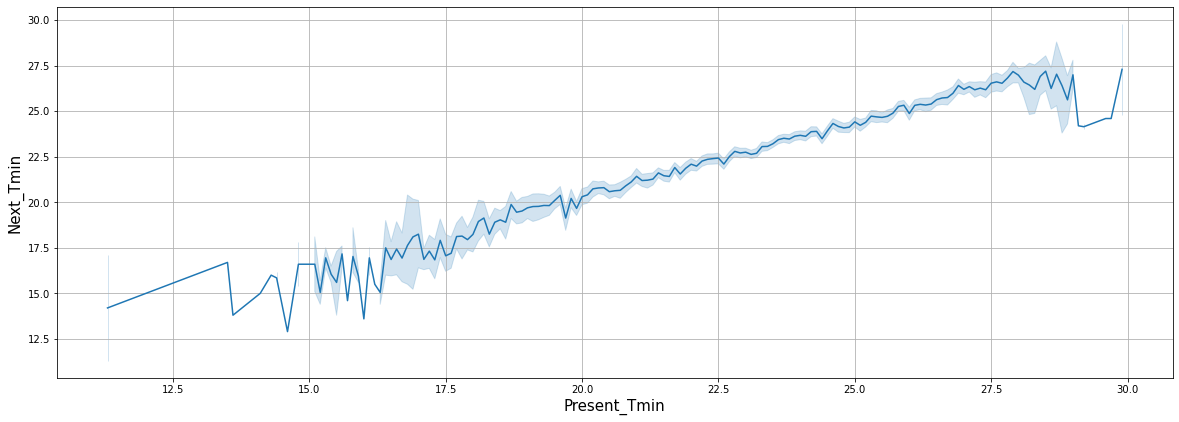

In [26]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sns.lineplot(x='Present_Tmax', y='Next_Tmax', data= data )
plt.xlabel('Present_Tmax', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)
plt.grid(True)
plt.show()

plt.figure(figsize=(20,15))
plt.subplot(2,1,2)
sns.lineplot(x='Present_Tmin', y='Next_Tmin', data= data )
plt.xlabel('Present_Tmin', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)
plt.grid(True)
plt.show()

The Graph showing relationship between Present and Next Tmin and Tmax , we can see a linear relationship between bith the temparture, and it is ture also. 
The cahnge in the temprature cannot be drastic, it can be can be positve or negative by few points only. 

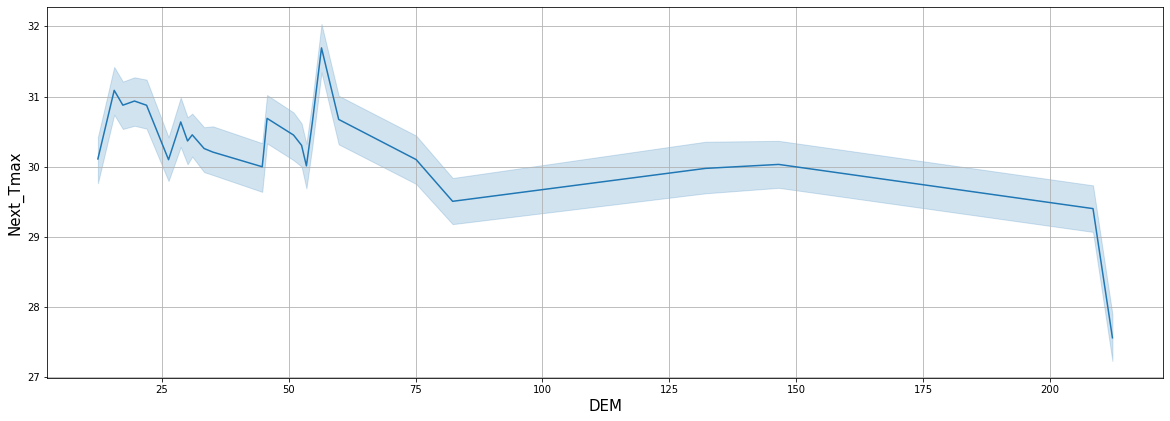

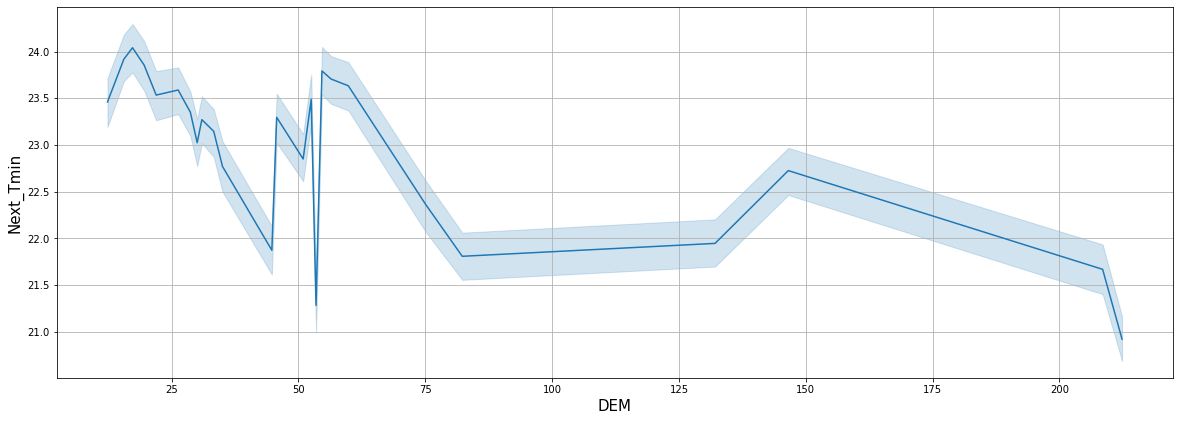

In [27]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sns.lineplot(x='DEM', y='Next_Tmax', data= data )
plt.xlabel('DEM', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)
plt.grid(True)
plt.show()

plt.figure(figsize=(20,15))
plt.subplot(2,1,2)
sns.lineplot(x='DEM', y='Next_Tmin', data= data )
plt.xlabel('DEM', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)
plt.grid(True)
plt.show()

The graph showing the relationship between the Temprature and elevation.  
As we can see with increase in the elevation there is decrease in the Next_Tmin and Next_Tmax. 

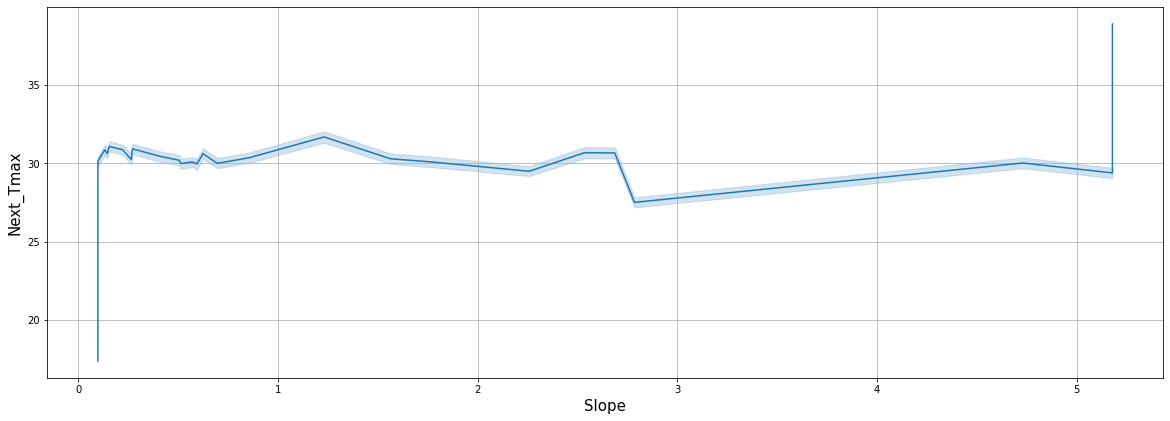

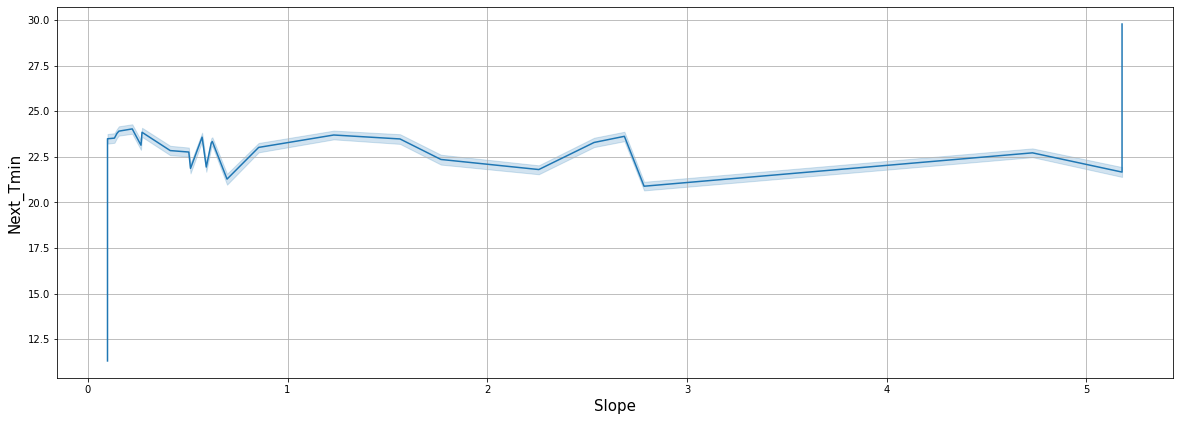

In [28]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sns.lineplot(x='Slope', y='Next_Tmax', data= data )
plt.xlabel('Slope', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)
plt.grid(True)
plt.show()

plt.figure(figsize=(20,15))
plt.subplot(2,1,2)
sns.lineplot(x='Slope', y='Next_Tmin', data= data )
plt.xlabel('Slope', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)
plt.grid(True)
plt.show()

Here we can see with increase initially the temprature increases but it is almost constant but after 5 it is increases.  
Both the Tempratures showing same relation.

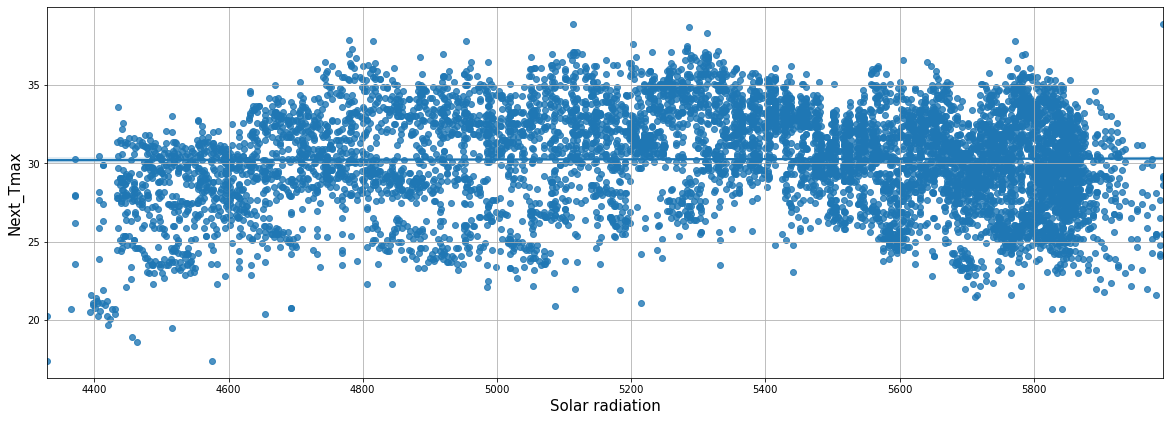

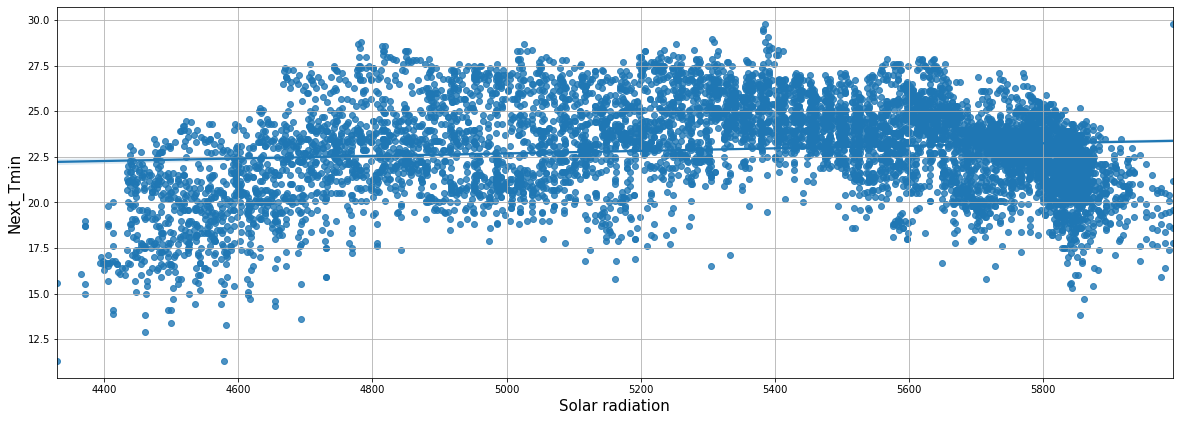

In [29]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sns.regplot(x='Solar radiation', y='Next_Tmax', data= data )
plt.xlabel('Solar radiation', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)
plt.grid(True)
plt.show()

plt.figure(figsize=(20,15))
plt.subplot(2,1,2)
sns.regplot(x='Solar radiation', y='Next_Tmin', data= data )
plt.xlabel('Solar radiation', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)
plt.grid(True)
plt.show()

Here we can see relationship between solar radiation and temprature.  we can see strong but non linear relation between both the quantity.  


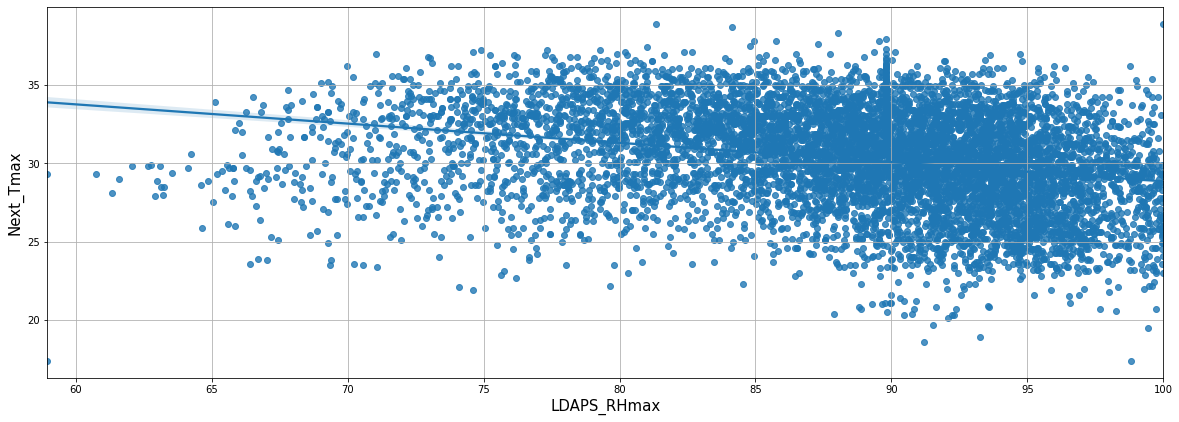

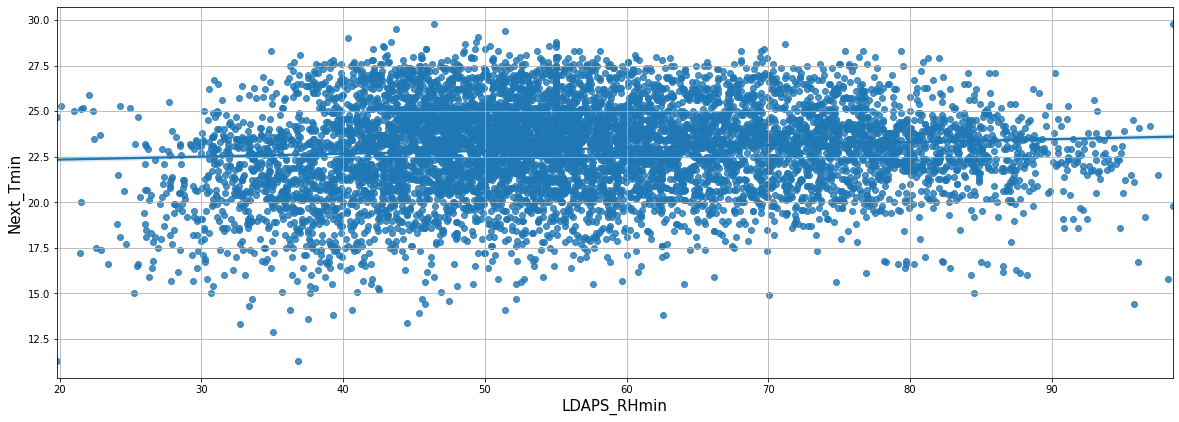

In [30]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sns.regplot(x='LDAPS_RHmax', y='Next_Tmax', data= data )
plt.xlabel('LDAPS_RHmax', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)
plt.grid(True)
plt.show()

plt.figure(figsize=(20,15))
plt.subplot(2,1,2)
sns.regplot(x='LDAPS_RHmin', y='Next_Tmin', data= data )
plt.xlabel('LDAPS_RHmin', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)
plt.grid(True)
plt.show()

Here we can see Moderate negative relationship

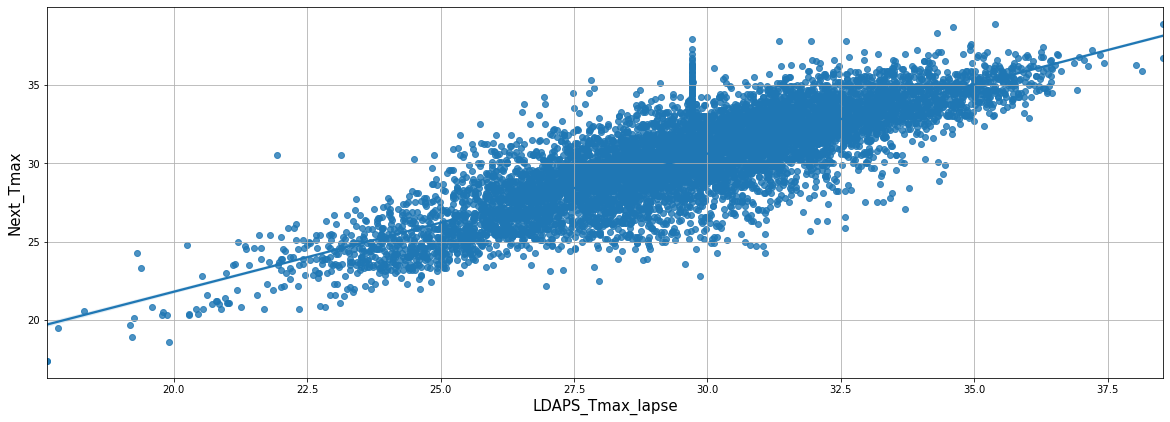

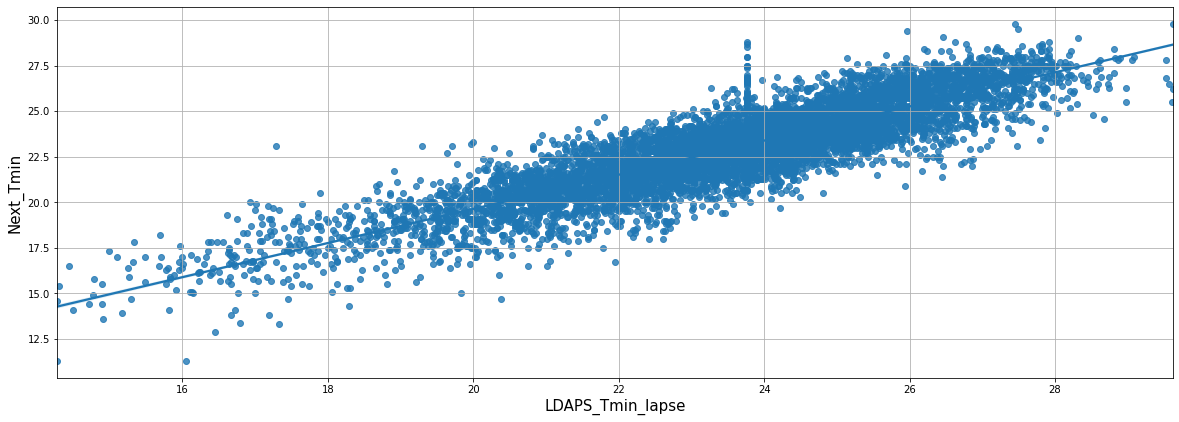

In [31]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sns.regplot(x='LDAPS_Tmax_lapse', y='Next_Tmax', data= data )
plt.xlabel('LDAPS_Tmax_lapse', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)
plt.grid(True)
plt.show()

plt.figure(figsize=(20,15))
plt.subplot(2,1,2)
sns.regplot(x='LDAPS_Tmin_lapse', y='Next_Tmin', data= data )
plt.xlabel('LDAPS_Tmin_lapse', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)
plt.grid(True)
plt.show()

The Graph shows relationship betweem Air_temprature and Next day temprature. We can observe a clearly as strong positive relatoionship.  

Text(0, 0.5, 'Next_Tmin')

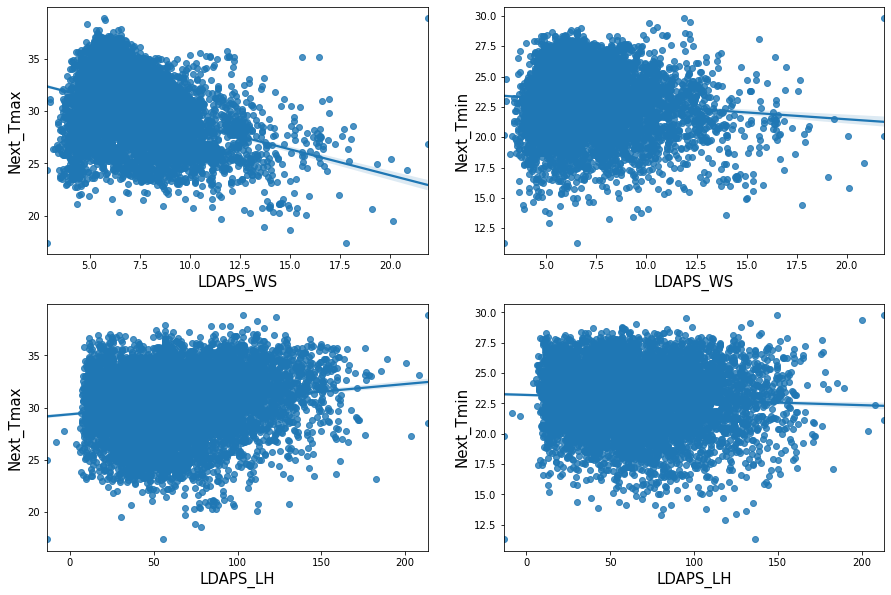

In [32]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.regplot(x='LDAPS_WS', y='Next_Tmax', data= data )
plt.xlabel('LDAPS_WS', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)


plt.subplot(2,2,2)
sns.regplot(x='LDAPS_WS', y='Next_Tmin', data= data )
plt.xlabel('LDAPS_WS', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)



plt.subplot(2,2,3)
sns.regplot(x='LDAPS_LH', y='Next_Tmax', data= data )
plt.xlabel('LDAPS_LH', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)



plt.subplot(2,2,4)
sns.regplot(x='LDAPS_LH', y='Next_Tmin', data= data )
plt.xlabel('LDAPS_LH', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)


Here Graph shows the relationship between the latent heat and Next Day temprature.  
We can see decrease in the temprature with increase of latent heat , in the forth graph we can see no relation with Latent heat and temprature. 

Text(0, 0.5, 'Next_Tmin')

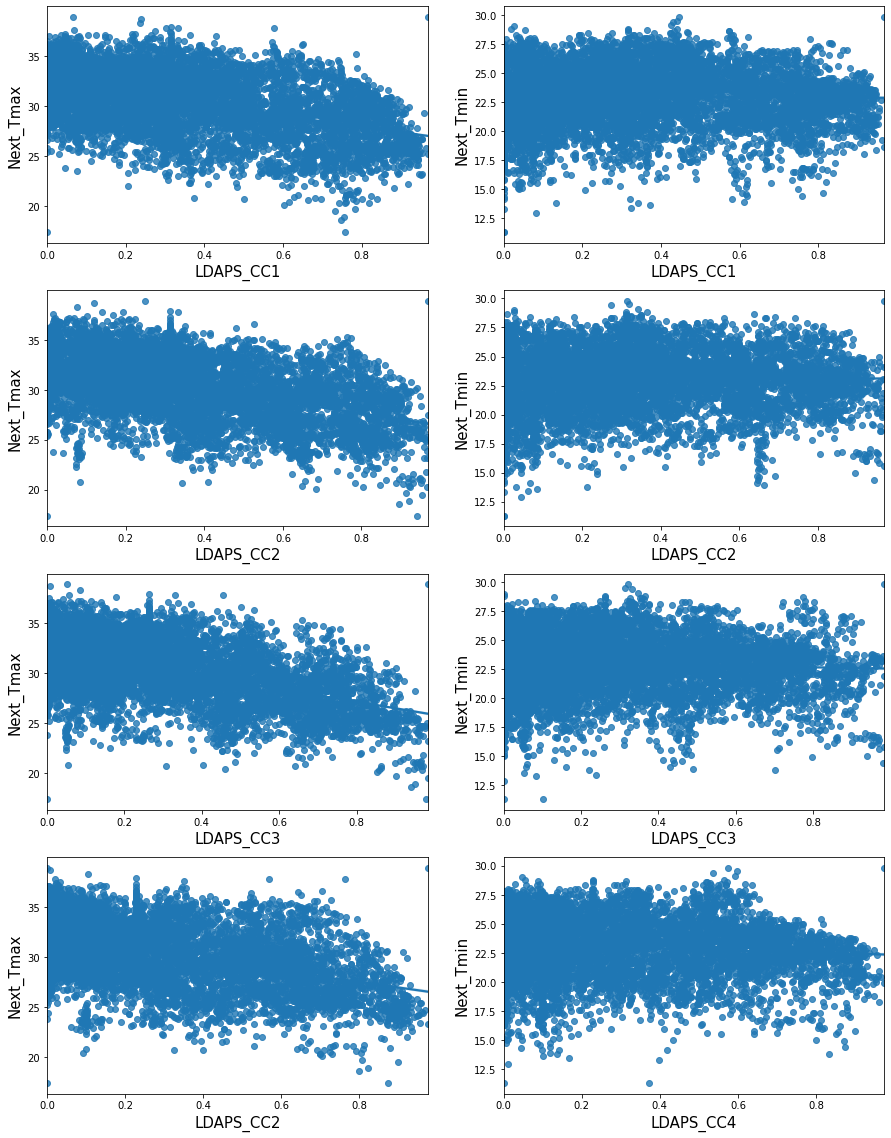

In [33]:
plt.figure(figsize=(15,20))

plt.subplot(4,2,1)
sns.regplot(x='LDAPS_CC1', y='Next_Tmax', data= data )
plt.xlabel('LDAPS_CC1', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)


plt.subplot(4,2,2)
sns.regplot(x='LDAPS_CC1', y='Next_Tmin', data= data )
plt.xlabel('LDAPS_CC1', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)



plt.subplot(4,2,3)
sns.regplot(x='LDAPS_CC2', y='Next_Tmax', data= data )
plt.xlabel('LDAPS_CC2', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)



plt.subplot(4,2,4)
sns.regplot(x='LDAPS_CC2', y='Next_Tmin', data= data )
plt.xlabel('LDAPS_CC2', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)


plt.subplot(4,2,5)
sns.regplot(x='LDAPS_CC3', y='Next_Tmax', data= data )
plt.xlabel('LDAPS_CC3', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)


plt.subplot(4,2,6)
sns.regplot(x='LDAPS_CC3', y='Next_Tmin', data= data )
plt.xlabel('LDAPS_CC3', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)



plt.subplot(4,2,7)
sns.regplot(x='LDAPS_CC4', y='Next_Tmax', data= data )
plt.xlabel('LDAPS_CC2', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)



plt.subplot(4,2,8)
sns.regplot(x='LDAPS_CC4', y='Next_Tmin', data= data )
plt.xlabel('LDAPS_CC4', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)

Here we can see the graphs between split average cloud cover and Next day temprature.  
Graphs Showing is not showing very good relationship.   
In most of the graphs we can see slightly negative relation.   

Text(0, 0.5, 'Next_Tmin')

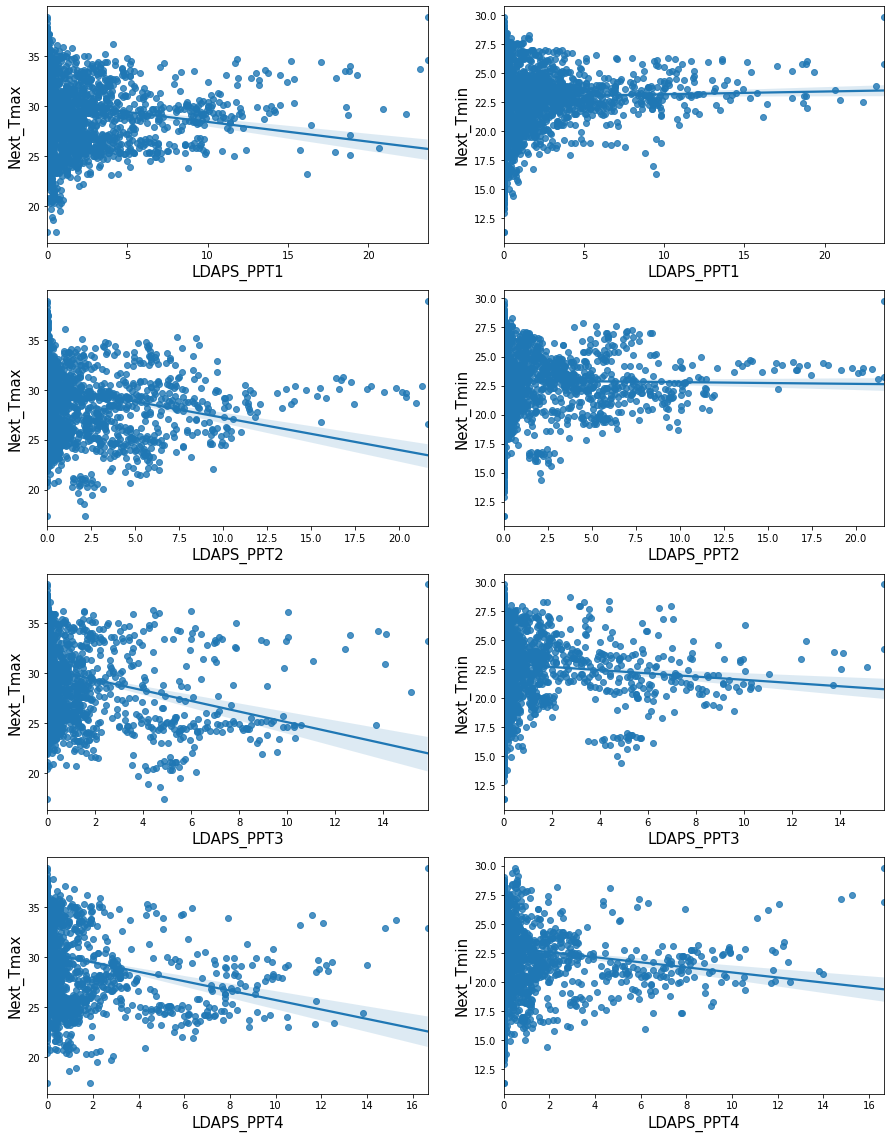

In [34]:
plt.figure(figsize=(15,20))

plt.subplot(4,2,1)
sns.regplot(x='LDAPS_PPT1', y='Next_Tmax', data= data )
plt.xlabel('LDAPS_PPT1', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)


plt.subplot(4,2,2)
sns.regplot(x='LDAPS_PPT1', y='Next_Tmin', data= data )
plt.xlabel('LDAPS_PPT1', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)



plt.subplot(4,2,3)
sns.regplot(x='LDAPS_PPT2', y='Next_Tmax', data= data )
plt.xlabel('LDAPS_PPT2', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)



plt.subplot(4,2,4)
sns.regplot(x='LDAPS_PPT2', y='Next_Tmin', data= data )
plt.xlabel('LDAPS_PPT2', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)


plt.subplot(4,2,5)
sns.regplot(x='LDAPS_PPT3', y='Next_Tmax', data= data )
plt.xlabel('LDAPS_PPT3', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)


plt.subplot(4,2,6)
sns.regplot(x='LDAPS_PPT3', y='Next_Tmin', data= data )
plt.xlabel('LDAPS_PPT3', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)



plt.subplot(4,2,7)
sns.regplot(x='LDAPS_PPT4', y='Next_Tmax', data= data )
plt.xlabel('LDAPS_PPT4', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)



plt.subplot(4,2,8)
sns.regplot(x='LDAPS_PPT4', y='Next_Tmin', data= data )
plt.xlabel('LDAPS_PPT4', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)

Here we can see realtioship between split average precipitation and Temprature , we can clearly see a negative realtionship between both the quantities. 

### Data Preprocessing 

In this Step we will perform all the preprocessing steps before model buiding like we will drop the irrelivent columns, we scale the data and remove the skewness and ouliers. 

Lets Firts drop the irrilevent columns. 

From Data analysis step we can see date, lat and lon are having less or clearly no  effect on tagate. 
Station is numerical counting also not having any effect on temprature, lets drop all the columsn mentioned here. 

In [35]:
data.drop(['station', 'Date', 'lat', 'lon'], axis= 1, inplace= True)

In [36]:
data.shape

(7752, 21)

Here we can see we left with only 21 columns, lets Check Correlation 

### Checkign Correlation

In [37]:
data.corr()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
Present_Tmax,1.000000,0.618769,-0.205341,-0.300261,0.570287,0.624229,-0.123565,0.134216,-0.313176,-0.214904,-0.145477,-0.142549,-0.111148,-0.101362,-0.122051,-0.101118,-0.187138,-0.105884,-0.025401,0.610256,0.622700
Present_Tmin,0.618769,1.000000,0.121800,-0.012659,0.464420,0.764239,-0.037682,-0.011331,0.082000,0.088309,-0.005304,-0.047496,0.109085,0.064851,-0.049017,-0.065550,-0.250299,-0.146460,0.053638,0.471723,0.796657
LDAPS_RHmin,-0.205341,0.121800,1.000000,0.578770,-0.564575,0.089346,0.294537,-0.070654,0.613885,0.745482,0.689720,0.514163,0.262875,0.391110,0.240831,0.168797,0.102108,0.123736,0.244643,-0.439171,0.094061
LDAPS_RHmax,-0.300261,-0.012659,0.578770,1.000000,-0.373274,-0.113914,0.134786,0.238183,0.436097,0.390879,0.226434,0.130008,0.267698,0.228398,0.134087,0.117376,0.177134,0.219557,0.148259,-0.281282,-0.070193
LDAPS_Tmax_lapse,0.570287,0.464420,-0.564575,-0.373274,1.000000,0.654013,-0.311973,0.047954,-0.438410,-0.523594,-0.541260,-0.429456,-0.111105,-0.242113,-0.188133,-0.160300,-0.178895,-0.162332,0.047820,0.827473,0.587066
LDAPS_Tmin_lapse,0.624229,0.764239,0.089346,-0.113914,0.654013,1.000000,-0.130245,-0.134906,0.010691,0.047545,-0.044233,-0.080587,0.037727,0.000588,-0.088791,-0.094855,-0.195445,-0.185839,0.159445,0.588224,0.881074
LDAPS_WS,-0.123565,-0.037682,0.294537,0.134786,-0.311973,-0.130245,1.000000,0.007115,0.289792,0.261386,0.243402,0.221066,0.153213,0.192427,0.162173,0.144550,0.190995,0.171577,0.122966,-0.345578,-0.098730
LDAPS_LH,0.134216,-0.011331,-0.070654,0.238183,0.047954,-0.134906,0.007115,1.000000,-0.146920,-0.263934,-0.245130,-0.172222,-0.012042,-0.077061,0.016483,0.020332,0.055126,0.086770,-0.046553,0.155684,-0.056832
LDAPS_CC1,-0.313176,0.082000,0.613885,0.436097,-0.438410,0.010691,0.289792,-0.146920,1.000000,0.779752,0.517702,0.361386,0.446635,0.389771,0.169130,0.092119,-0.014087,-0.020747,0.219264,-0.454771,-0.012732
LDAPS_CC2,-0.214904,0.088309,0.745482,0.390879,-0.523594,0.047545,0.261386,-0.263934,0.779752,1.000000,0.725903,0.527893,0.306293,0.478681,0.240426,0.159853,-0.012821,-0.018070,0.171215,-0.492615,0.029829


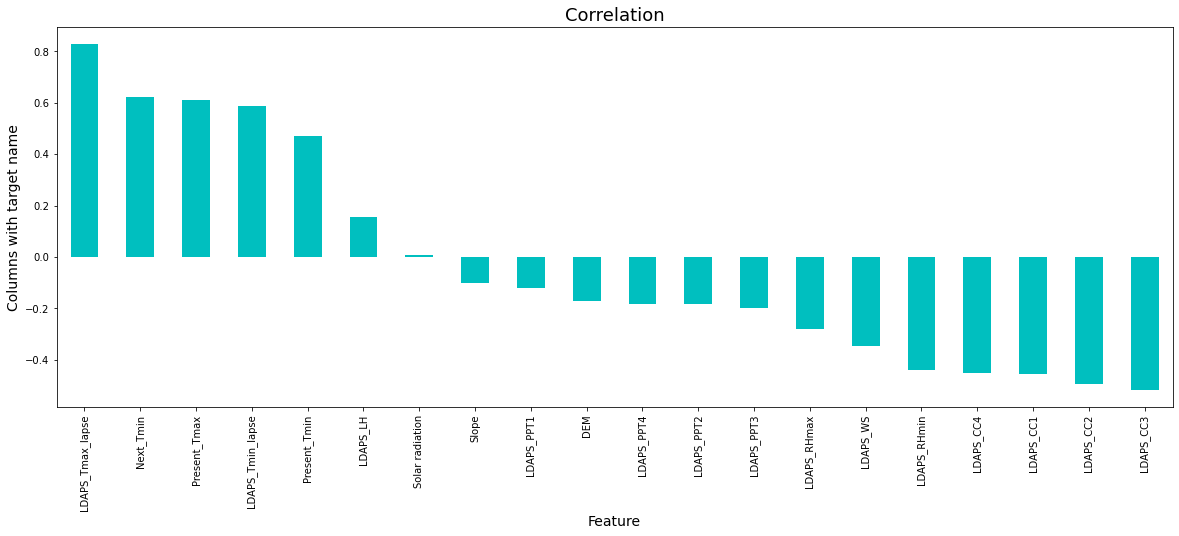

In [38]:
plt.figure(figsize=(20,7))
data.corr()['Next_Tmax'].sort_values(ascending=False).drop(['Next_Tmax']).plot(kind='bar',color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Columns with target name', fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

Here we can see a storng correltion between of LDAPS_Tmax_lapse, Present_Tmax,LDAPS_Tmin_lapse, Present_Tmin, LDAPS_LH and Solar radiation are having positve correlation,  other Fetaures having negative correlation.

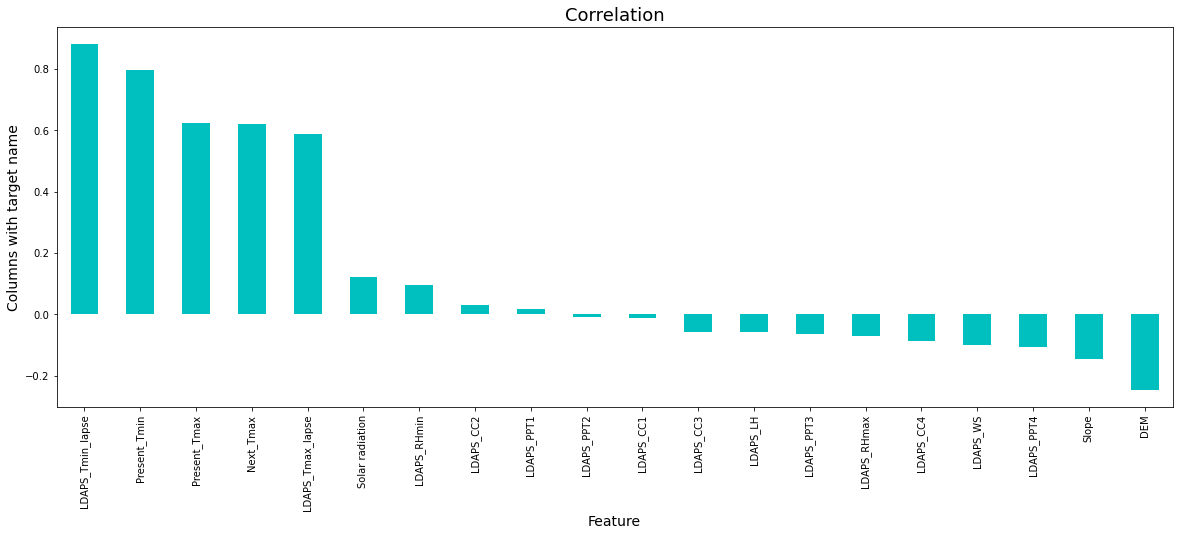

In [39]:
plt.figure(figsize=(20,7))
data.corr()['Next_Tmin'].sort_values(ascending=False).drop(['Next_Tmin']).plot(kind='bar',color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Columns with target name', fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

Here we can see a storng correltion between of LDAPS_Tmin_lapse, Present_Tmin,Present_Tmax, LDAPS_Tmax_lapse, Present_Tmin, LDAPS_LH, LDAPS_CC2, LDAPS_PPT1 , and Solar radiation are having positve correlation, other Fetaures having negative correlation.

## Checking Outliers

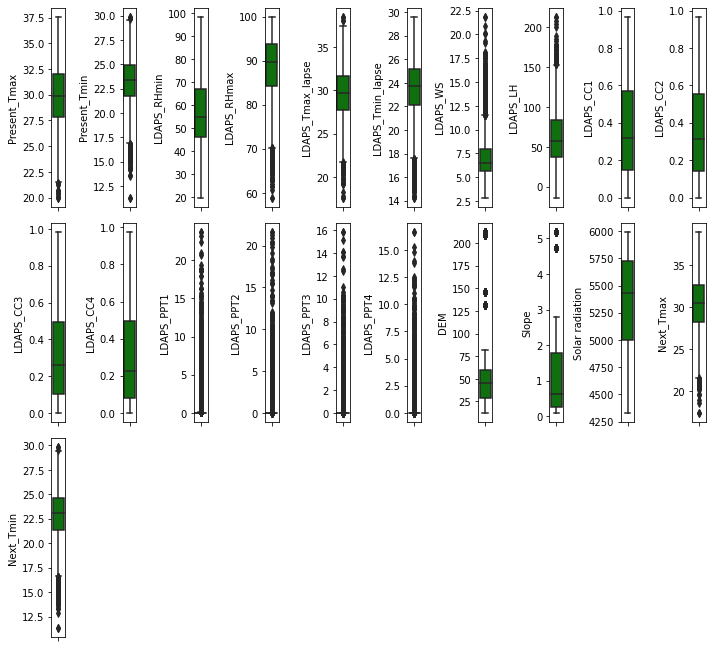

In [40]:
collist=data.columns.values
ncol= 10
nrows= 10
plt.figure(figsize=(ncol,3*ncol))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(y=data[collist[i]],color='green', orient='x')
    plt.tight_layout()

Here we can see Present_Tmin, LDAPS_RHmax, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, LDAPS_WS	LDAPS_LH, LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, and LDAPS_CC4 having many outliers, in next step we remove outliers.

## Removing Outliers

In [41]:
from scipy.stats import zscore
z= np.abs(zscore(data))
z

array([[0.36172509, 0.76016871, 0.10364866, ..., 1.51793488, 0.37652986,
        0.69782911],
       [0.72067506, 0.67693727, 0.30686646, ..., 1.22994952, 0.07184549,
        0.17429753],
       [0.61920005, 0.03053001, 0.55163711, ..., 1.21653443, 0.26400635,
        0.38950571],
       ...,
       [2.22210036, 2.42479758, 2.31620927, ..., 2.0743251 , 0.7928784 ,
        2.22815219],
       [3.30450051, 4.96335662, 2.53120872, ..., 2.35821196, 4.12366669,
        4.68472344],
       [2.64870034, 2.77716765, 2.86236882, ..., 1.51793488, 2.76209758,
        2.76553364]])

## Position of Outliers

In [42]:
threshold = 3
print(np.where(z > 3))

(array([  25,   25,   26, ..., 7751, 7751, 7751], dtype=int64), array([ 6, 13, 13, ..., 13, 14, 15], dtype=int64))


In [43]:
data_new=data[(z<3).all(axis=1)]
print(data.shape)
print(data_new.shape)

(7752, 21)
(6894, 21)


In [44]:
Loss_percentage=(7752-6894)/7752*100
print(Loss_percentage)

11.06811145510836


Here we can see we have data loss percentage 11.06 which greater that 10 percent, we will contineu with our orignal data. 

In [45]:
data.skew()

Present_Tmax       -0.265337
Present_Tmin       -0.369481
LDAPS_RHmin         0.303565
LDAPS_RHmax        -0.860210
LDAPS_Tmax_lapse   -0.228767
LDAPS_Tmin_lapse   -0.584737
LDAPS_WS            1.584975
LDAPS_LH            0.678315
LDAPS_CC1           0.465003
LDAPS_CC2           0.477041
LDAPS_CC3           0.646670
LDAPS_CC4           0.673700
LDAPS_PPT1          5.395178
LDAPS_PPT2          5.776835
LDAPS_PPT3          6.458608
LDAPS_PPT4          6.826930
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340943
Next_Tmin          -0.405143
dtype: float64

We can see data is having skewness in LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, DEM, Slope, LDAPS_RHmax, LDAPS_WS and LDAPS_LH.  

## Removing Skewness

In [46]:
from sklearn.preprocessing import power_transform

In [47]:
X=power_transform(data, method='yeo-johnson')

In [48]:
X= pd.DataFrame(data=X, columns= ['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'])

### Scaling the data Using StandardScaler.

In [49]:
# Dividing into Feature and Target data
x=X.drop(['Next_Tmax', 'Next_Tmin'],axis=1)
ymax=data['Next_Tmax']
ymin= data['Next_Tmin']

In [50]:
#Scaling the data using min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

xd=scaler.fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)

In [51]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF FACTOR']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [53]:
calc_vif(x)

,variables,VIF FACTOR
0,Present_Tmax,25.827466
1,Present_Tmin,44.449922
2,LDAPS_RHmin,59.950102
3,LDAPS_RHmax,17.287826
4,LDAPS_Tmax_lapse,59.483051
5,LDAPS_Tmin_lapse,57.120538
6,LDAPS_WS,19.034263
7,LDAPS_LH,59.546094
8,LDAPS_CC1,17.910615
9,LDAPS_CC2,20.309537


We can see few columns having higher VIF  we will drop one by one and check at every step.

In [54]:
x.drop(['LDAPS_RHmin'],axis=1, inplace= True)

In [55]:
calc_vif(x)

,variables,VIF FACTOR
0,Present_Tmax,25.047381
1,Present_Tmin,44.053799
2,LDAPS_RHmax,13.966267
3,LDAPS_Tmax_lapse,43.308967
4,LDAPS_Tmin_lapse,42.267337
5,LDAPS_WS,18.663838
6,LDAPS_LH,48.401234
7,LDAPS_CC1,17.786326
8,LDAPS_CC2,19.778993
9,LDAPS_CC3,15.991539


In [56]:
x.drop(['LDAPS_LH'],axis=1, inplace= True)

In [57]:
calc_vif(x)

,variables,VIF FACTOR
0,Present_Tmax,22.009314
1,Present_Tmin,43.638648
2,LDAPS_RHmax,9.896363
3,LDAPS_Tmax_lapse,33.384581
4,LDAPS_Tmin_lapse,35.498577
5,LDAPS_WS,16.226480
6,LDAPS_CC1,17.338326
7,LDAPS_CC2,19.709221
8,LDAPS_CC3,15.926216
9,LDAPS_CC4,9.618795


In [58]:
x.drop(['Present_Tmin'],axis=1, inplace= True)

In [59]:
calc_vif(x)

,variables,VIF FACTOR
0,Present_Tmax,18.243249
1,LDAPS_RHmax,9.224051
2,LDAPS_Tmax_lapse,32.729169
3,LDAPS_Tmin_lapse,29.255799
4,LDAPS_WS,15.671996
5,LDAPS_CC1,17.087160
6,LDAPS_CC2,19.705087
7,LDAPS_CC3,15.924862
8,LDAPS_CC4,9.575833
9,LDAPS_PPT1,2.871436


In [60]:
x.drop(['LDAPS_Tmax_lapse'],axis=1, inplace= True)

In [61]:
calc_vif(x)

,variables,VIF FACTOR
0,Present_Tmax,16.387528
1,LDAPS_RHmax,9.032540
2,LDAPS_Tmin_lapse,18.300666
3,LDAPS_WS,14.758883
4,LDAPS_CC1,16.947070
5,LDAPS_CC2,18.696732
6,LDAPS_CC3,15.527766
7,LDAPS_CC4,9.523547
8,LDAPS_PPT1,2.847818
9,LDAPS_PPT2,2.583490


In [62]:
x.drop(['LDAPS_CC2'],axis=1, inplace= True)

In [63]:
calc_vif(x)

,variables,VIF FACTOR
0,Present_Tmax,16.367212
1,LDAPS_RHmax,8.905184
2,LDAPS_Tmin_lapse,18.199125
3,LDAPS_WS,14.756111
4,LDAPS_CC1,11.315758
5,LDAPS_CC3,12.959446
6,LDAPS_CC4,9.523513
7,LDAPS_PPT1,2.724140
8,LDAPS_PPT2,2.214950
9,LDAPS_PPT3,2.194886


In [64]:
x.drop(['LDAPS_Tmin_lapse'],axis=1, inplace= True)

In [65]:
calc_vif(x)

,variables,VIF FACTOR
0,Present_Tmax,6.525007
1,LDAPS_RHmax,8.885355
2,LDAPS_WS,14.694059
3,LDAPS_CC1,10.144945
4,LDAPS_CC3,12.951297
5,LDAPS_CC4,9.517273
6,LDAPS_PPT1,2.661220
7,LDAPS_PPT2,2.212382
8,LDAPS_PPT3,2.194857
9,LDAPS_PPT4,2.013666


In [66]:
x.drop(['LDAPS_WS'],axis=1, inplace= True)

In [67]:
calc_vif(x)

,variables,VIF FACTOR
0,Present_Tmax,4.760964
1,LDAPS_RHmax,8.506020
2,LDAPS_CC1,9.570874
3,LDAPS_CC3,12.904517
4,LDAPS_CC4,9.423493
5,LDAPS_PPT1,2.654948
6,LDAPS_PPT2,2.211501
7,LDAPS_PPT3,2.194650
8,LDAPS_PPT4,1.989337
9,DEM,11.880327


In [68]:
x.drop(['LDAPS_CC3'],axis=1, inplace= True)

In [69]:
calc_vif(x)

,variables,VIF FACTOR
0,Present_Tmax,4.709926
1,LDAPS_RHmax,8.501329
2,LDAPS_CC1,8.362328
3,LDAPS_CC4,4.806686
4,LDAPS_PPT1,2.580740
5,LDAPS_PPT2,2.190570
6,LDAPS_PPT3,1.970139
7,LDAPS_PPT4,1.976206
8,DEM,11.876357
9,Slope,8.335862


we can contineu with this data we almost removed colliear data. 

### Model Building

In [70]:
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, ElasticNet

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [74]:
# Chosing Best Random State
lr=LinearRegression()
for i in range(0, 1000):
    x_train, x_test, y_train, y_test= train_test_split(x,ymin,random_state= i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train= lr.predict(x_train)
    pred_test= lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)== round(r2_score(y_test,pred_test)*100,1):
        print("At Random state ", i, "The Model performing Well")
        print("At Random State", i)
        print("Training Accuracy score is-",r2_score(y_train,pred_train)*100 )
        print("Testing Accuracy Score is-", r2_score(y_test,pred_test)*100)

At Random state  24 The Model performing Well
At Random State 24
Training Accuracy score is- 49.9806309896102
Testing Accuracy Score is- 49.958388706906746
At Random state  69 The Model performing Well
At Random State 69
Training Accuracy score is- 49.980066561126726
Testing Accuracy Score is- 49.96883542681376
At Random state  123 The Model performing Well
At Random State 123
Training Accuracy score is- 49.98798771287265
Testing Accuracy Score is- 49.95420694916023
At Random state  221 The Model performing Well
At Random State 221
Training Accuracy score is- 49.97960570739527
Testing Accuracy Score is- 49.96315226310065
At Random state  271 The Model performing Well
At Random State 271
Training Accuracy score is- 49.96639765298322
Testing Accuracy Score is- 49.969536004883594
At Random state  457 The Model performing Well
At Random State 457
Training Accuracy score is- 49.98400436023959
Testing Accuracy Score is- 49.95627782921195
At Random state  512 The Model performing Well
At Rand

At Random State 730  
Training Accuracy score is- 49.98034980817665  
Testing Accuracy Score is- 49.98088251854958  

In [76]:
x_train_b, x_test_b, y_train_b, y_test_b= train_test_split(x,ymin,random_state=730,test_size=0.25)
lr.fit(x_train_b, y_train_b)
lr_pred=lr.predict(x_test_b)
print(r2_score(y_test_b,lr_pred))

0.4968377098184198


### Cross Validation of Model

In [79]:
test_accuracy= r2_score(y_test_b,lr_pred)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(lr,x,ymin,cv=i, scoring='r2')
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 32.20003528244762 and Accuracy score is 49.68377098184198
At cross fold 3 the Cross Val score is 28.598946596153535 and Accuracy score is 49.68377098184198
At cross fold 4 the Cross Val score is 34.361348994390816 and Accuracy score is 49.68377098184198
At cross fold 5 the Cross Val score is 31.224040068745694 and Accuracy score is 49.68377098184198
At cross fold 6 the Cross Val score is 25.08492806443931 and Accuracy score is 49.68377098184198
At cross fold 7 the Cross Val score is 28.473288360766976 and Accuracy score is 49.68377098184198
At cross fold 8 the Cross Val score is 28.835209029577097 and Accuracy score is 49.68377098184198
At cross fold 9 the Cross Val score is 5.232564039116262 and Accuracy score is 49.68377098184198


At cross fold 4 the Cross Val score is 34.361348994390816 and Accuracy score is 49.68377098184198  
Diffrence in both is very high lets try Another models.

In [80]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,lr_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,lr_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,lr_pred)))

Error:
Mean Absolute Error: 1.3910029176111978
Mean Squared Error: 3.078124050305511
Root Mean Square Error: 1.7544583353005312


## 2. Lasso

In [82]:
ls=Lasso()
ls.fit(x_train_b, y_train_b)
ls.score(x_train_b, y_train_b)
ls_pred=ls.predict(x_test_b)

lsd=r2_score(y_test_b, ls_pred)
print('R2 score:', lsd*100)

rdscore= cross_val_score(ls,x,ymin,cv=4,scoring='r2')
lsc=rdscore.mean()
print('Cross val Score :', lsc*100) 

R2 score: -0.02058118460259717
Cross val Score : -13.067561296868346


In [85]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,ls_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,ls_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,ls_pred)))

Error:
Mean Absolute Error: 1.9573265556290405
Mean Squared Error: 6.1188161847096
Root Mean Square Error: 2.473624099314526


Model performance is very poor. 

### 3. Ridge

In [84]:
rd= Ridge()
rd.fit(x_train_b, y_train_b)
rd.score(x_train_b, y_train_b)
rd_pred= rd.predict(x_test_b)

rds=r2_score(y_test_b, rd_pred)
print('r2 score: ', rds*100)

rdcvscore= cross_val_score(rd,x,ymin,cv=4, scoring='r2')
rdcv=rdcvscore.mean()
print('Cross val Score', rdcv*100)

r2 score:  49.68355091643556
Cross val Score 34.35267406716226


In [86]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,rd_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,rd_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,rd_pred)))

Error:
Mean Absolute Error: 1.3910241704323243
Mean Squared Error: 3.0781375129324484
Root Mean Square Error: 1.7544621719867455


r2 score:  49.68355091643556  
Cross val Score 34.35267406716226   
Diffrence in both the score is high, we can check for other model. 

### 3. Decision TreeRegressor

In [87]:
dt=DecisionTreeRegressor()
dt.fit(x_train_b, y_train_b)
dt.score(x_train_b, y_train_b)
dt_pred=dt.predict(x_test_b)

dt_score=r2_score(y_test_b, dt_pred)
print('R2 Score:', dt_score*100)

dtcvscore=cross_val_score(dt,x,ymin,cv=4,scoring='r2')
dtcv=dtcvscore.mean()
print('Cross Val Score:', dtcv*100)

R2 Score: 61.80611864679555
Cross Val Score: 1.7214417133055244


In [88]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,dt_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,dt_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,dt_pred)))

Error:
Mean Absolute Error: 1.0737874097007223
Mean Squared Error: 2.3365325077399386
Root Mean Square Error: 1.5285720485930452


Here we can see cross validation score is very less, modle perfomance is poor. 

### 4. KNeighborsRegressor

In [89]:
kn=KNeighborsRegressor()
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b,y_train_b)
kn_pred=kn.predict(x_test_b)

kn_score= r2_score(y_test_b, kn_pred)
print('R2 Score:', kn_score*100)

kn_cvscore=cross_val_score(kn,x,ymin, cv=4, scoring='r2')
cv_mean=kn_cvscore.mean()
print('Cross val Score :',cv_mean*100 )

R2 Score: 70.95223826553689
Cross val Score : 12.105820977006374


In [90]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,kn_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,kn_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,kn_pred)))

Error:
Mean Absolute Error: 1.000763673890609
Mean Squared Error: 1.7770134158926727
Root Mean Square Error: 1.3330466668097831


R2 Score : 70.95223826553689   
Cross val Score : 12.105820977006374   
Both the score having big diffrence, lets try another model

### 5. Ensemble Techniques

In [91]:
rf=RandomForestRegressor()
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= r2_score(y_test_b, rf_pred)
print('R2 score:', rf_score*100)

rfcv=cross_val_score(rf,x,ymin, cv=4, scoring='r2')
rfcvscore=rfcv.mean()
print('Cross val Score :',rfcvscore*100 )

R2 score: 83.15889887303645
Cross val Score : 35.85381346133614


In [92]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,rf_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,rf_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,rf_pred)))

Error:
Mean Absolute Error: 0.7412946336429307
Mean Squared Error: 1.0302639809081522
Root Mean Square Error: 1.0150192022361706


R2 score: 83.15889887303645  
Cross val Score : 35.85381346133614   
Both the score having big diffrence, lets try another model. 

### 7. GradientBoostingRegressor

In [93]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b,y_train_b)
gb_pred=rf.predict(x_test_b)

gb_score= r2_score(y_test_b, gb_pred)
print('R2 score:', gb_score*100)

gbcv=cross_val_score(gb,x,ymin, cv=4, scoring='r2')
gbcvscore=gbcv.mean()
print('Cross val Score :',gbcvscore*100 )

R2 score: 83.15889887303645
Cross val Score : 43.88866341977301


In [94]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,gb_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,gb_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,gb_pred)))

Error:
Mean Absolute Error: 0.7412946336429307
Mean Squared Error: 1.0302639809081522
Root Mean Square Error: 1.0150192022361706


R2 score: 83.15889887303645   
Cross val Score : 43.88866341977301   
Both the score having big diffrence , still Ridge and Liear model performing well.

### Lets Try Hyper Parameter Tuning

We will try Hyper para mere Tuning on Ridge,GradientBoostingRegressor

In [95]:
# Hyperparameter tunnign wih Lasso 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

parameters= {'alpha':[0.0001,0.001,0.01,0.1,1,10], 'random_state': list(range(0,10)), 'max_iter': [500,1000,1500,2000, 2500], 'selection':['cyclic',' random']}
ls=Lasso()
clf=GridSearchCV(ls, parameters)
clf.fit(x_train_b, y_train_b)
print(clf.best_params_)

{'alpha': 0.001, 'max_iter': 500, 'random_state': 0, 'selection': 'cyclic'}


In [97]:
ls=Lasso(alpha=0.001,max_iter=500, random_state=0, selection='cyclic')
ls.fit(x_train_b, y_train_b)
ls.score(x_train_b, y_train_b)
ls_pred=ls.predict(x_test_b)

lsd=r2_score(y_test_b, ls_pred)
print('R2 score:', lsd*100)

rdscore= cross_val_score(ls,x,ymin,cv=4, scoring='r2')
lsc=rdscore.mean()
print('Cross val Score :', lsc*100)

R2 score: 49.657411146208844
Cross val Score : 34.41188427734937


In [98]:
from sklearn.ensemble import GradientBoostingRegressor
parameters={'loss':['lad', 'huber'],'criterion':['friedman_mse', 'mae'], 'learning_rate':[0.001,0.01,0.1], 'n_estimators':[10,20,100]}
gb=GradientBoostingRegressor()
gbclf=GridSearchCV(gb, param_grid=parameters, n_jobs=-1)
gbclf.fit(x_train_b, y_train_b)
print(gbclf.best_params_)

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'huber', 'n_estimators': 100}


In [101]:
gb=GradientBoostingRegressor(criterion='friedman_mse',learning_rate=0.1, loss='huber', n_estimators= 100)
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b,y_train_b)
gb_pred=rf.predict(x_test_b)

gb_score= r2_score(y_test_b, rf_pred)
print('R2 score:', gb_score*100)

gbcv=cross_val_score(gb,x,ymin, cv=4, scoring='r2')
gbcvscore=gbcv.mean()
print('Cross val Score :',gbcvscore*100 )

R2 score: 83.15889887303645
Cross val Score : 44.40959498235421
